# PW 04

**Auteurs : Pedro Costa, Louis Delabays, Jonathan Guerne**

## Exercice 1

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [482]:
data = pd.read_excel('lausanne-appart.xlsx')

In [483]:
X = data.iloc[:,0].values.reshape((-1,1))
Y = data.iloc[:,2].values.reshape((-1,1))

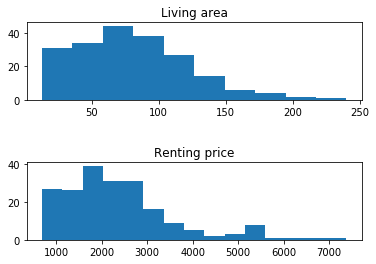

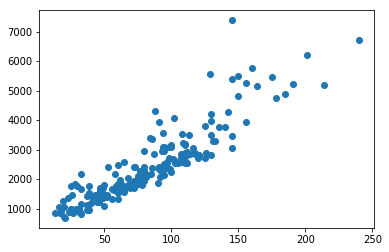

In [485]:
f, axarr = plt.subplots(2)

axarr[0].set_title('Living area')
axarr[0].hist(X)

axarr[1].set_title('Renting price')
axarr[1].hist(Y,bins='auto')


f.subplots_adjust(hspace=0.8)

plt.show()


plt.scatter(x=X,y=Y)

plt.show()

## Exercice 2

[[240.07710727]
 [ 26.33242457]]


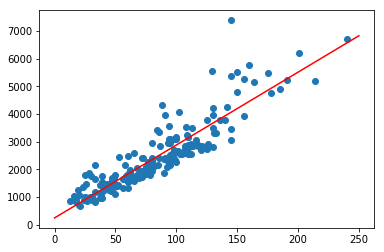

In [486]:
X_bias = np.ones((len(X),len(X[0])+1))
X_bias[:,1:] = X

a = np.linalg.inv(np.dot(X_bias.T,X_bias))
b = np.dot(a,X_bias.T)
thetas = np.dot(b,Y)

print(thetas)

plt.scatter(x=X,y=Y)
x = np.linspace(0, 250, 10)
plt.plot(x,thetas[0] + thetas[1]*x,c='red')

plt.show()

In [491]:
def H_theta(thetas,x):
    if len(thetas) == len(x):
        sum = 0 
        for i in range(len(x)):
            sum += thetas[i] * (x[i]**i)
        return sum
    elif len(thetas) == len(x[0]):
        print('here')
        
#def h(x,thetas):
#    return thetas[0]*x[0] + thetas[1]*x[1]

def cost_fun(thetas,X,Y):
    #a = np.apply_along_axis(h, 1, X, thetas)
    #return 1 / (2 * len(X)) * np.sum(np.power(a - Y, 2))
    
    a =  np.sum([(H_theta(thetas,X[i])-Y[i])**2 for i in range(len(X))])
    return a/(2*len(X))
        

cost_fun(thetas,X_bias,Y)

138034.95779787414

## Exercice 3

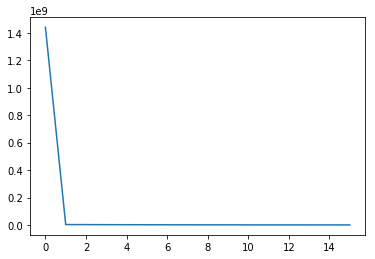

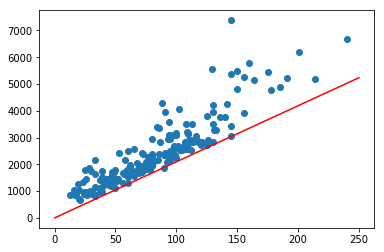

In [494]:
# theta batch descent
def getTheta_db(X,Y,aplha=0.000001,epsilon = 0.2,epoch=100):
    
    th_bd = np.zeros(len(X[0]))
    prev_cost = 9999999  
    
    m = 0
    s = len(X)
    
    cost_values = []
    cur_cost = np.sum([(th_bd[0] + th_bd[1]*X[n,1] - Y[n])**2 for n in range(s)])
    cost_values.append(cur_cost)
    
    #while abs((prev_cost-cur_cost)/cur_cost) > epsilon:
    while m < epoch:
        m+= 1
        
        for i in range(len(th_bd)):
            a = float(1.0/s * np.sum([(H_theta(th_bd,X[n]) - Y[n]) * X[n,i] for n in range(s)]))
            b = th_bd[i] - alpha * a
            th_bd[i] = b
        
        
        prev_cost = cur_cost
        cur_cost = cost_fun(th_bd,X,Y)
        cost_values.append(cur_cost)

    plt.plot(np.arange(m + 1),cost_values)
    plt.show()
    
    return th_bd
        
thetas_bd = getTheta_db(X_bias,Y)
plt.scatter(x=X,y=Y)
x = np.linspace(0, 250, 100)
plt.plot(x,thetas_bd[0] + thetas_bd[1]*x,c='red')
plt.show()

(201, 1)
[[-1810. -1810. -1810. ... -1810. -1810. -1810.]
 [-2945. -2945. -2945. ... -2945. -2945. -2945.]
 [ -685.  -685.  -685. ...  -685.  -685.  -685.]
 ...
 [-6200. -6200. -6200. ... -6200. -6200. -6200.]
 [-6700. -6700. -6700. ... -6700. -6700. -6700.]
 [-7383. -7383. -7383. ... -7383. -7383. -7383.]]
-478027.0
(201, 1)
[[-1810. -1810. -1810. ... -1810. -1810. -1810.]
 [-2945. -2945. -2945. ... -2945. -2945. -2945.]
 [ -685.  -685.  -685. ...  -685.  -685.  -685.]
 ...
 [-6200. -6200. -6200. ... -6200. -6200. -6200.]
 [-6700. -6700. -6700. ... -6700. -6700. -6700.]
 [-7383. -7383. -7383. ... -7383. -7383. -7383.]]
[4.78027 0.     ]


ValueError: x and y must have same first dimension, but have shapes (400,) and (0,)

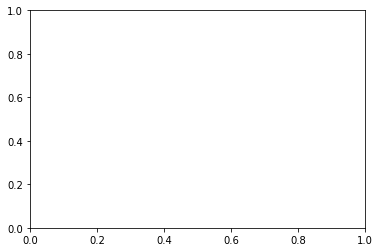

In [471]:
alpha = 0.00001
cost_value = []
numEpoch = 400
thetas2 = np.zeros(2)
N = len(X)

def J_b(thetas, opt_terme=1):
    a = np.apply_along_axis(h, 1, X_bias, thetas2)
    print(Y.shape)
    print(a-Y)
    return (1 / N) * np.sum((a - Y) * opt_terme)


for i in range(numEpoch):
    print(J_b(thetas2, X_bias[:,0]))
    
    thetas2[0] = thetas2[0] - alpha * J_b(thetas2, X_bias[:,0])
    break
    thetas2[1] = thetas2[1] - alpha * J_b(thetas2, X_bias[:,1])
    cost_value.append(cost_fun(thetas2,X_bias, Y))

print(thetas2)
    
plt.plot(np.arange(numEpoch),cost_value)
plt.show()
